In [34]:
import pandas as pd
import numpy as np
import pandas as pd
from haversine import haversine, Unit
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
import pickle
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

- Leemos todos los documentos que guardamos en el archivo de EDA

In [35]:
ruta = "/workspaces/Emiliano0041-IntroML/data/processed/"

with open(ruta + "modelo04.pkl", "rb") as f:
    modelo = pickle.load(f)
with open (ruta + "train04.pkl", "rb") as f:
    train = pickle.load(f)
with open (ruta + "test04.pkl", "rb") as f:
    test = pickle.load(f)



- Lo convertimos todo de nuevo a df

In [36]:
X_train = train["X_train"]
y_train = train["y_train"]
X_test = test["X_test"]
y_test = test["y_test"]
modelo_arbol = modelo["modelo"]

- Entrenamos el modelo con nuestros datos

In [37]:
modelo_arbol.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,22
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


- Realizamos predicciones

In [38]:
y_pred = modelo_arbol.predict(X_test)

- Medimos el accurancy, report y matriz de confusion

In [39]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7974683544303798

In [40]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        59
           1       0.59      0.65      0.62        20

    accuracy                           0.80        79
   macro avg       0.73      0.75      0.74        79
weighted avg       0.80      0.80      0.80        79



In [41]:
matriz = confusion_matrix(y_test, y_pred)
matriz

array([[50,  9],
       [ 7, 13]])

- Graficamos la toma de decisiones del modelo

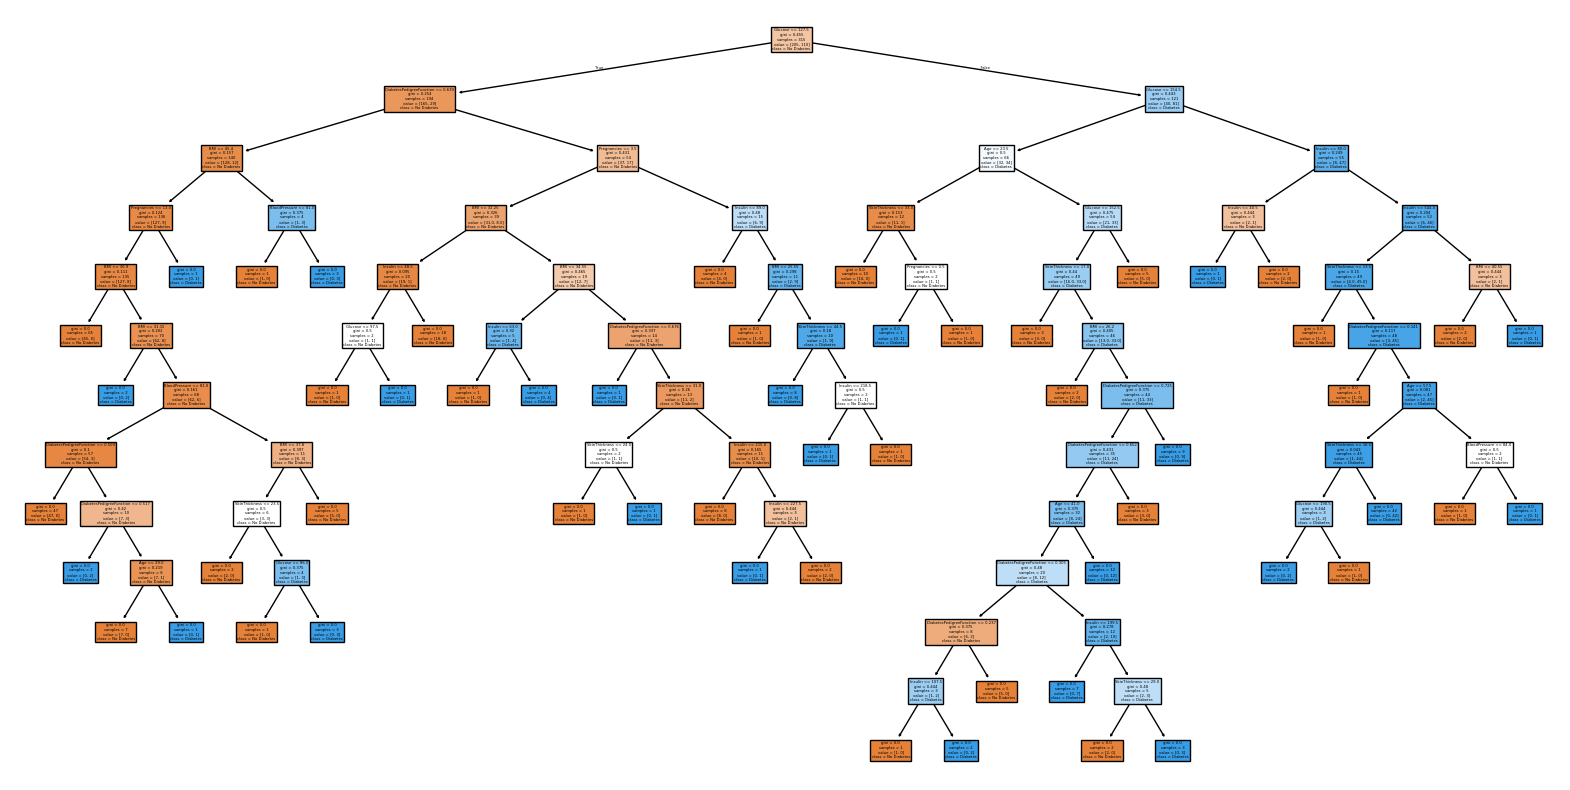

In [42]:

plt.figure(figsize=(20, 10))
plot_tree(modelo_arbol, feature_names=X_train.columns, class_names=["No Diabetes", "Diabetes"], filled=True)
plt.show()


- Probe cambiando algunos hiperparametros, a ver si podia optimizar mi modelo

In [50]:
modelo_optimizado = DecisionTreeClassifier(
    max_depth=4,
    min_samples_leaf=10,
    random_state=42, 
    class_weight="balanced"
)

modelo_optimizado.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [52]:
modelo_optimizado.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [54]:
y_pred_2 = modelo_optimizado.predict(X_test)


In [55]:
accuracy_2 = accuracy_score(y_test, y_pred_2)
accuracy_2

0.7468354430379747

In [56]:
report_2 = classification_report(y_test, y_pred_2)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        59
           1       0.59      0.65      0.62        20

    accuracy                           0.80        79
   macro avg       0.73      0.75      0.74        79
weighted avg       0.80      0.80      0.80        79

